In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pickle
from keras.models import load_model
from sklearn.datasets import load_files
from keras.utils import np_utils
from glob import glob
import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.optimizers import Adamax
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D
from keras.callbacks import TensorBoard, ReduceLROnPlateau, ModelCheckpoint
from keras.utils import to_categorical
from keras.models import Model
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential

In [ ]:
import numpy as np
import os
import glob

import matplotlib.pyplot as plt
import pandas as pd



from keras.layers import Dense, Input, Conv2D, Flatten, MaxPool2D, Activation, Dropout, BatchNormalization
from keras.optimizers import Adamax
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import backend as K


from keras.layers import Dense, Activation
#from keras.utils import to_categorical
from keras import backend as k


Using TensorFlow backend.


In [4]:
from keras.utils import to_categorical


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [20]:
#loading back the pre-processed numpy files
X_train = np.load('/content/drive/My Drive/Code/X_train4.npy')
X_test = np.load('/content/drive/My Drive/Code/X_test4.npy')
y_train = np.load('/content/drive/My Drive/Code/y_train4.npy')
y_test = np.load('/content/drive/My Drive/Code/y_test4.npy')

In [21]:
X_test

array([[[[0.30196078, 0.38823529, 0.52941176],
         [0.31764706, 0.4       , 0.55686275],
         [0.23137255, 0.31764706, 0.48235294],
         ...,
         [0.8745098 , 0.89803922, 0.91764706],
         [0.8745098 , 0.89803922, 0.91764706],
         [0.8745098 , 0.89803922, 0.91764706]],

        [[0.34509804, 0.43137255, 0.57254902],
         [0.2745098 , 0.36078431, 0.52156863],
         [0.18823529, 0.27843137, 0.44705882],
         ...,
         [0.88235294, 0.90980392, 0.92941176],
         [0.88235294, 0.90980392, 0.92941176],
         [0.88235294, 0.90980392, 0.92941176]],

        [[0.31764706, 0.4       , 0.54901961],
         [0.22745098, 0.31764706, 0.4745098 ],
         [0.20784314, 0.29803922, 0.46666667],
         ...,
         [0.88627451, 0.90980392, 0.92941176],
         [0.88627451, 0.90980392, 0.92941176],
         [0.88627451, 0.90980392, 0.92941176]],

        ...,

        [[0.09411765, 0.19215686, 0.36862745],
         [0.21960784, 0.31764706, 0.49803922]

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2205, 100, 100, 3), (552, 100, 100, 3), (2205, 2), (552, 2))

In [23]:
X_train[0].shape[0], X_train[0].shape[1]

(100, 100)

In [24]:
#assigning values to image height and image width as 100*100

img_height, img_width = X_train[0].shape[0], X_train[0].shape[1]
num_classes =2

In [25]:
#assigning the resenet50 layers as the base model without utlizing the imagenet weights to train the layers

base_model = applications.resnet50.ResNet50(weights = None, include_top=False, input_shape = (img_height, img_width,3))

In [26]:
x= base_model.output                                                                #assigning the output of the basemodel
x = GlobalAveragePooling2D()(x)                                             #Pooling layer
x = Dense(512, activation = 'relu')(x)                                        #activation layer - Utlized Rectifier Linear model
predictions =Dense (num_classes, activation='softmax')(x)                   #Output layer with two outputs - Mask / No Mask
model = Model(inputs = base_model.input, outputs = predictions)       #assigning the input and output values to the Model

In [27]:
from keras.optimizers import Adam
adam = Adam(lr=0.0001)
model.compile(optimizer=adam, loss = 'categorical_crossentropy', metrics=['accuracy'])            #compiling the model

In [28]:
#fit the model
history = model.fit(x=X_train,
                   y = y_train,
                   batch_size=64,
                   epochs = 20,
                   verbose=1,
                   validation_data = (X_test, y_test),
                    shuffle = True)

Epoch 1/20
35/35 [==============================] - 429s 12s/step - loss: 0.6447 - accuracy: 0.6916 - val_loss: 0.7053 - val_accuracy: 0.5163
Epoch 2/20
35/35 [==============================] - 433s 12s/step - loss: 0.3596 - accuracy: 0.8463 - val_loss: 0.7701 - val_accuracy: 0.5163
Epoch 3/20
35/35 [==============================] - 429s 12s/step - loss: 0.2796 - accuracy: 0.8930 - val_loss: 1.0627 - val_accuracy: 0.5163
Epoch 4/20
35/35 [==============================] - 429s 12s/step - loss: 0.2138 - accuracy: 0.9197 - val_loss: 1.9646 - val_accuracy: 0.5163
Epoch 5/20
35/35 [==============================] - 429s 12s/step - loss: 0.1577 - accuracy: 0.9388 - val_loss: 2.4707 - val_accuracy: 0.5163
Epoch 6/20
29/35 [=======================>......] - ETA: 1:10 - loss: 0.0863 - accuracy: 0.9688

KeyboardInterrupt: ignored

In [ ]:
model.save("mask_trained_model.h5")

In [ ]:
preds = model.evaluate(X_test, y_test)

828/828 [==============================] - 36s 44ms/step


In [ ]:
print("Loss =" +str(preds[0]))

Loss =0.3770663712695601


In [ ]:
print("Test accuracy =" +str(preds[1]))

Test accuracy =0.9275362491607666


In [ ]:
model.summary()

<bound method Network.summary of <keras.engine.training.Model object at 0x7f734b4dbe48>>

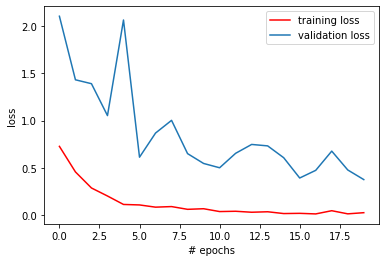

In [ ]:
#Plotting the accuracy and loss curves

from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

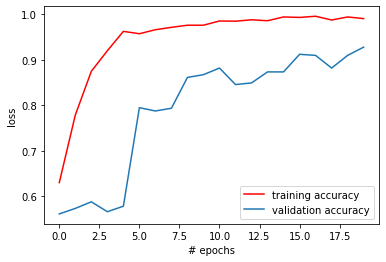

In [ ]:
 plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [ ]:
 print(model.evaluate(X_test,y_test))

828/828 [==============================] - 36s 44ms/step
[0.3770663712695601, 0.9275362491607666]


In [ ]:
predicted_classes = model.predict(X_test, batch_size=64)

In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [ ]:
predicted_classes.shape, y_test.shape

In [ ]:
from keras.utils import np_utils

predicted_classes1 = np_utils.to_categorical(predicted_classes)

In [ ]:
#CLASSIFICATION REPORT

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes1, target_names=target_names))

In [ ]:
#CONFUSION MATRIX

from sklearn.metrics import confusion_matrix, cohen_kappa_score
print(confusion_matrix(y_test, predicted_classes1))

In [ ]:
print(cohen_kappa_score(y_test, predicted_classes1))